In [4]:
# Let's import the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [5]:
#opening database and visualization
fertilizer_area=pd.read_csv('./data/Environment_Fertilizers_E_All_Data_(Normalized).zip',sep=',',encoding='latin-1')

#Determining countries most fertilizer consumer for the last year of using
fertilizer=(fertilizer_area.query('`Item Code` == (3102)')
    .query('`Year Code` == 2016')
    .query('`Area Code` <300')
    .sort_values('Value', ascending=False)
)

fertilizer.head()

SyntaxError: invalid syntax (<unknown>, line 1)

In [3]:
#opening database and visualization
crops=pd.read_csv('./data/Production_Crops_E_All_Data_(Normalized).zip',sep=',',encoding='latin-1')

grouped_yields=(crops.query('`Element Code` == 5419')
        .query('`Year Code` == 2016')
        .query('`Item Code` >1000')
        .pivot(index='Area',columns='Item',values='Value')
        .fillna(value=0)
        .reset_index()
          )
grouped_yields.head()

Item,Area,Cereals (Rice Milled Eqv),"Cereals,Total","Citrus Fruit,Total","Coarse Grain, Total",Fruit Primary,"Pulses,Total","Roots and Tubers,Total","Treenuts,Total",Vegetables Primary
0,Afghanistan,19391.0,19816.0,83127.0,16667.0,88201.0,7406.0,119868.0,15984.0,91869.0
1,Africa,14245.0,15261.0,108260.0,13007.0,88514.0,7629.0,85875.0,5437.0,83707.0
2,Albania,47164.0,47164.0,271093.0,54585.0,225650.0,13178.0,245894.0,48487.0,272656.0
3,Algeria,10204.0,10204.0,181242.0,7647.0,105776.0,9978.0,304431.0,13223.0,219122.0
4,American Samoa,0.0,0.0,0.0,0.0,41581.0,0.0,38299.0,0.0,37544.0


In [256]:
def ferti_class(x, L): #associate a color to each bin of fertilizer
    if x<np.percentile(L,33):
        return 'low'
    elif np.percentile(L,33)<=x<np.percentile(L,66):
        return 'medium'
    else:
        return 'high'

In [257]:
%run PCA_processing

pca,grouped_yield_pca = PCA_processing(grouped_yields,'Area', grouped_yields.columns[1:])

In [258]:
grouped_yield_pca=pd.merge(grouped_yield_pca,fertilizer.loc[:,['Area','Value']],left_on='Area',right_on='Area')

In [259]:
grouped_yield_pca['ferti_class']=grouped_yield_pca.Value.apply(lambda x: ferti_class(x, grouped_yield_pca.Value))

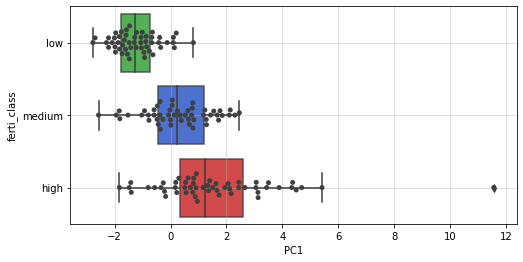

In [260]:
fig = plt.figure(figsize = (8,4))
#sns.palplot(sns.cubehelix_palette(3))
ax = sns.boxplot(x='PC1', y='ferti_class', data=grouped_yield_pca, palette=sns.xkcd_palette(colors), boxprops=dict(alpha=.8))
ax = sns.swarmplot(x='PC1', y='ferti_class', data=grouped_yield_pca, color=".25")
ax.grid(alpha=0.5)

Text(0, 0.5, 'Fertilizer use')

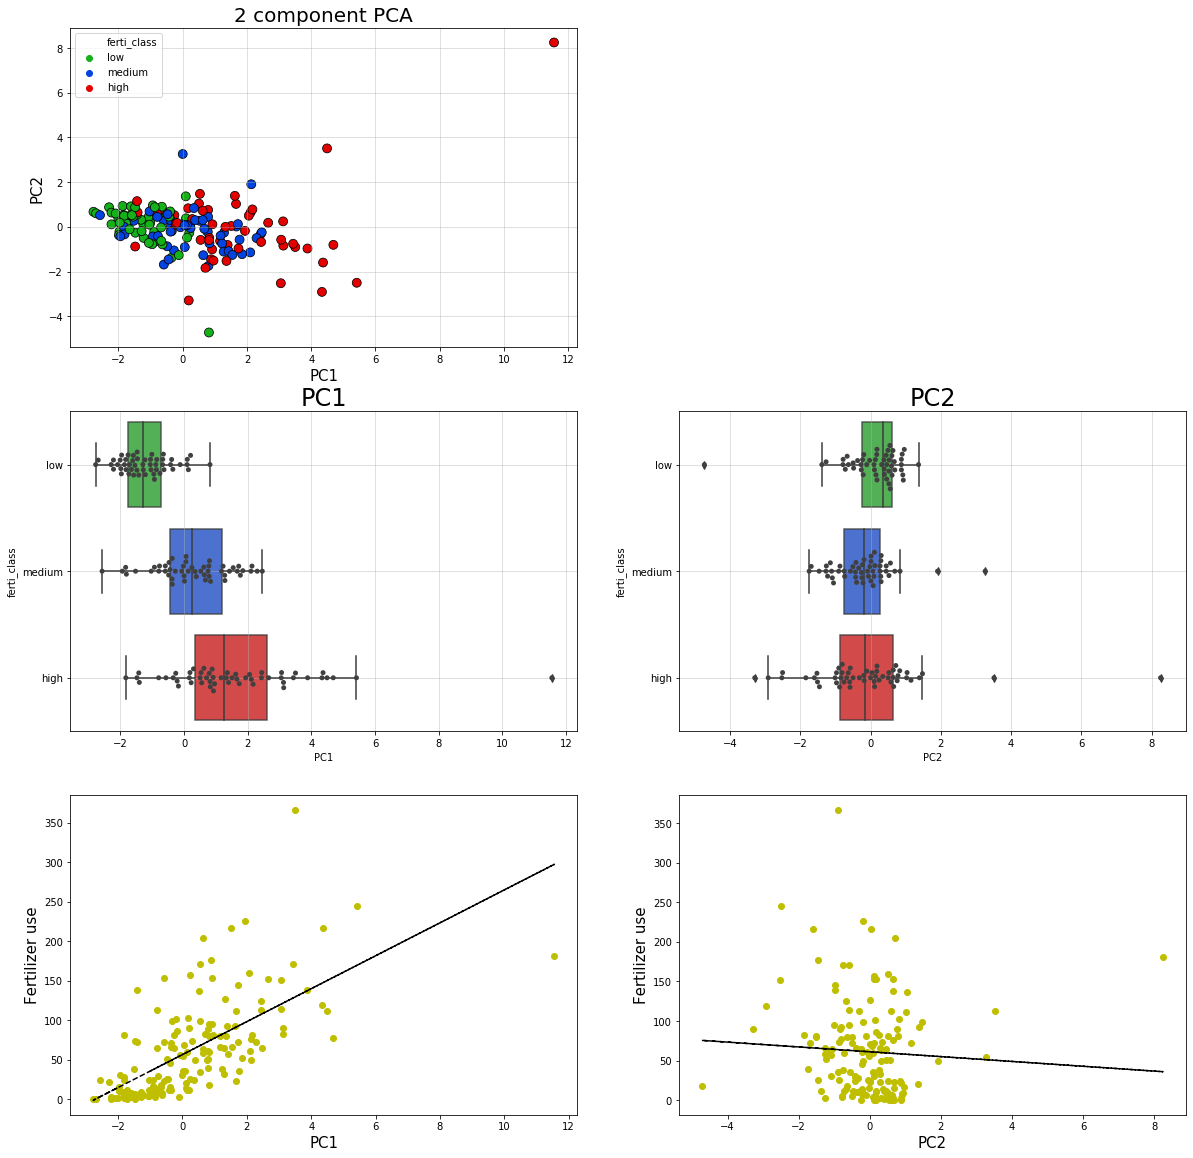

In [261]:
#Viz for 1 year 
figure = plt.figure(figsize = (20,20))
colors = ["green", "blue", "red"]

ax1 = figure.add_subplot(3,2,1)
ax1.set_xlabel('Principal Component 1', fontsize = 15)
ax1.set_ylabel('Principal Component 2', fontsize = 15)
ax1.set_title('2 component PCA', fontsize = 20)
ax1.grid(alpha=0.5)
ax1 = sns.scatterplot(x='PC1', y='PC2', hue='ferti_class', palette=sns.xkcd_palette(colors), data=grouped_yield_pca, s=80,edgecolor="black")

ax2 = figure.add_subplot(3,2,3)
ax2 = sns.boxplot(x='PC1', y='ferti_class', data=grouped_yield_pca, palette=sns.xkcd_palette(colors), boxprops=dict(alpha=.8))
ax2 = sns.swarmplot(x='PC1', y='ferti_class', data=grouped_yield_pca, color=".25")
ax2.grid(alpha=0.5)
plt.title('PC1', fontsize=24);

ax3 = figure.add_subplot(3,2,4)
ax3 = sns.boxplot(x='PC2', y='ferti_class', data=grouped_yield_pca, palette=sns.xkcd_palette(colors), boxprops=dict(alpha=.8))
ax3 = sns.swarmplot(x='PC2', y='ferti_class', data=grouped_yield_pca, color=".25")
ax3.grid(alpha=0.5)
plt.title('PC2', fontsize=24);

ax4 = figure.add_subplot(3,2,5)
coef = np.polyfit(grouped_yield_pca.PC1,grouped_yield_pca.Value,1)
poly1d_fn = np.poly1d(coef)
plt.plot(grouped_yield_pca.PC1,grouped_yield_pca.Value, 'yo',grouped_yield_pca.PC1, poly1d_fn(grouped_yield_pca.PC1), '--k')
ax4.set_xlabel('PC1', fontsize = 15)
ax4.set_ylabel('Fertilizer use', fontsize = 15)

ax5 = figure.add_subplot(3,2,6)
coef = np.polyfit(grouped_yield_pca.PC2,grouped_yield_pca.Value,1)
poly1d_fn = np.poly1d(coef)
plt.plot(grouped_yield_pca.PC2,grouped_yield_pca.Value, 'yo',grouped_yield_pca.PC2, poly1d_fn(grouped_yield_pca.PC2), '--k')
ax5.set_xlabel('PC2', fontsize = 15)
ax5.set_ylabel('Fertilizer use', fontsize = 15)

**Observation:** Clear correlation between PC1 and fertilizer use. Due to what yield? 
Some outliers, why?

In [262]:
df = pd.DataFrame(pca.components_, columns=list(grouped_yields.columns[1:]))
df.head()

,Cereals (Rice Milled Eqv),"Cereals,Total","Citrus Fruit,Total","Coarse Grain, Total",Fruit Primary,"Pulses,Total","Roots and Tubers,Total","Treenuts,Total",Vegetables Primary
0,0.447310,0.445459,0.064642,0.440154,0.248610,0.308481,0.371344,0.168310,0.283501
1,0.358542,0.359029,-0.236136,0.361944,-0.353178,-0.269843,-0.377510,-0.235045,-0.400590


**Observation:** PC1 relies mostly on Cereals, Coarse Grain, Roots and Tubers, and Pulses.

In [263]:
yields_ferti = pd.merge(grouped_yields,fertilizer.loc[:,['Area','Value']],left_on='Area',right_on='Area')

Text(0, 0.5, 'Fertilizer use')

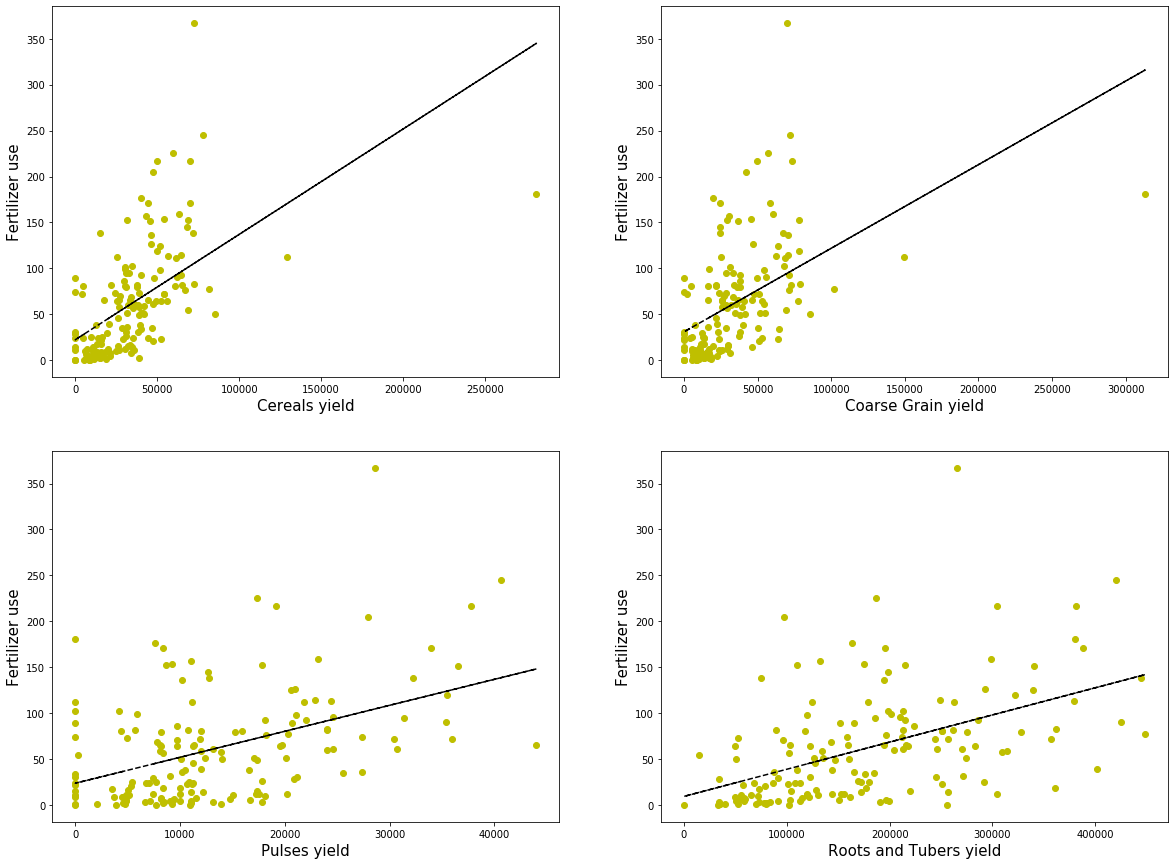

In [264]:
#Viz for 1 year 
figure = plt.figure(figsize = (20,15))

ax1 = figure.add_subplot(2,2,1)
coef = np.polyfit(yields_ferti['Cereals,Total'],yields_ferti.Value,1)
poly1d_fn = np.poly1d(coef)
plt.plot(yields_ferti['Cereals,Total'],yields_ferti.Value, 'yo',yields_ferti['Cereals,Total'], poly1d_fn(yields_ferti['Cereals,Total']), '--k')
ax1.set_xlabel('Cereals yield', fontsize = 15)
ax1.set_ylabel('Fertilizer use', fontsize = 15)

ax2 = figure.add_subplot(2,2,2)
coef = np.polyfit(yields_ferti['Coarse Grain, Total'],yields_ferti.Value,1)
poly1d_fn = np.poly1d(coef)
plt.plot(yields_ferti['Coarse Grain, Total'],yields_ferti.Value, 'yo',yields_ferti['Coarse Grain, Total'], poly1d_fn(yields_ferti['Coarse Grain, Total']), '--k')
ax2.set_xlabel('Coarse Grain yield', fontsize = 15)
ax2.set_ylabel('Fertilizer use', fontsize = 15)

ax3 = figure.add_subplot(2,2,3)
coef = np.polyfit(yields_ferti['Pulses,Total'],yields_ferti.Value,1)
poly1d_fn = np.poly1d(coef)
plt.plot(yields_ferti['Pulses,Total'],yields_ferti.Value, 'yo',yields_ferti['Pulses,Total'], poly1d_fn(yields_ferti['Pulses,Total']), '--k')
ax3.set_xlabel('Pulses yield', fontsize = 15)
ax3.set_ylabel('Fertilizer use', fontsize = 15)

ax4 = figure.add_subplot(2,2,4)
coef = np.polyfit(yields_ferti['Roots and Tubers,Total'],yields_ferti.Value,1)
poly1d_fn = np.poly1d(coef)
plt.plot(yields_ferti['Roots and Tubers,Total'],yields_ferti.Value, 'yo',yields_ferti['Roots and Tubers,Total'], poly1d_fn(yields_ferti['Roots and Tubers,Total']), '--k')
ax4.set_xlabel('Roots and Tubers yield', fontsize = 15)
ax4.set_ylabel('Fertilizer use', fontsize = 15)

**Observation:** As seen in the PCA, strong correlations between the fertilizer use and the presented yields. This is only for 1 year, how does it evolve? And how this evolution compare with the evolution of fertilizer use? 

In [277]:
fertilizer_area.tail()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
8403,5873,OECD,3104,Nutrient potash K2O (total),5159,Use per area of cropland,2012,2012,kg/ha,20.22,Fc
8404,5873,OECD,3104,Nutrient potash K2O (total),5159,Use per area of cropland,2013,2013,kg/ha,21.13,Fc
8405,5873,OECD,3104,Nutrient potash K2O (total),5159,Use per area of cropland,2014,2014,kg/ha,21.59,Fc
8406,5873,OECD,3104,Nutrient potash K2O (total),5159,Use per area of cropland,2015,2015,kg/ha,21.78,Fc
8407,5873,OECD,3104,Nutrient potash K2O (total),5159,Use per area of cropland,2016,2016,kg/ha,21.78,Fc


In [282]:
%run PCA_processing

years = []
PC1_low = []
PC1_medium = []
PC1_high = []
PC1 = []
ferti_low = []
ferti_medium = []
ferti_high = []
ferti = []
proportion_explained = []
for year in range(2002,2017):
    print(year)
    years += [year]
    
    grouped_yield=crops.query('`Element Code` == 5419')\
                                .query('`Year Code` == @year')\
                                .query('`Item Code` >1000')\
                                .pivot(index='Area',columns='Item',values='Value')\
                                .fillna(value=0)\
                                .reset_index()

    pca,grouped_yield_pca = PCA_processing(grouped_yield,'Area', grouped_yield.columns[1:])


    fertilizer=(fertilizer_area.query('`Item Code` == (3102)')
        .query('`Year Code` == @year')
        .query('`Area Code` <300')
        .sort_values('Value', ascending=False)
    )

    grouped_yield_pca=pd.merge(grouped_yield_pca,fertilizer.loc[:,['Area','Value']],left_on='Area',right_on='Area')
    grouped_yield_pca['ferti_class']=grouped_yield_pca.Value.apply(lambda x: ferti_class(x, grouped_yield_pca.Value))

    PC1_low += [np.median(grouped_yield_pca.PC1[grouped_yield_pca.ferti_class=='low'])]
    PC1_medium += [np.median(grouped_yield_pca.PC1[grouped_yield_pca.ferti_class=='medium'])]
    PC1_high += [np.median(grouped_yield_pca.PC1[grouped_yield_pca.ferti_class=='high'])]
    PC1 += [np.median(grouped_yield_pca.PC1)]
    
    
    #print(len(grouped_yield_pca.Value[grouped_yield_pca.ferti_class=='low']),len(grouped_yield_pca.Value[grouped_yield_pca.ferti_class=='medium']),len(grouped_yield_pca.Value[grouped_yield_pca.ferti_class=='high']))
    ferti_low += [np.median(grouped_yield_pca.Value[grouped_yield_pca.ferti_class=='low'])]
    ferti_medium += [np.median(grouped_yield_pca.Value[grouped_yield_pca.ferti_class=='medium'])]
    ferti_high += [np.median(grouped_yield_pca.Value[grouped_yield_pca.ferti_class=='high'])]
    
    ferti += [np.median(grouped_yield_pca.Value)]
                          
    proportion_explained += [pca.explained_variance_ratio_[0]]

2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


<Figure size 432x288 with 0 Axes>

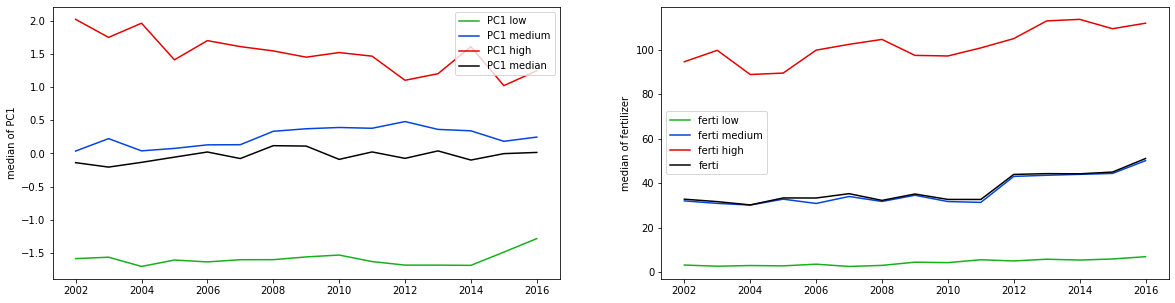

In [316]:
evolution_ferti = pd.DataFrame([years, PC1_low, PC1_medium, PC1_high, ferti_low, ferti_medium, ferti_high,ferti,PC1], ['year', 'PC1 low', 'PC1 medium', 'PC1 high','ferti low', 'ferti medium', 'ferti high','ferti','PC1 median']).T

figure = plt.figure(figsize = (20,5))
ax1 = figure.add_subplot(1,2,1)
ax1.plot("year", "PC1 low", data=evolution_ferti, color=sns.xkcd_palette(colors)[0])
ax1.plot("year", "PC1 medium", data=evolution_ferti, color=sns.xkcd_palette(colors)[1])
ax1.plot("year", "PC1 high", data=evolution_ferti, color=sns.xkcd_palette(colors)[2])
ax1.plot("year", "PC1 median", data=evolution_ferti, color=sns.xkcd_rgb["black"])
ax1.set_ylabel('median of PC1')
ax1.legend()

ax2 = figure.add_subplot(1,2,2)
ax2.plot("year", "ferti low", data=evolution_ferti, color=sns.xkcd_palette(colors)[0])
ax2.plot("year", "ferti medium", data=evolution_ferti, color=sns.xkcd_palette(colors)[1])
ax2.plot("year", "ferti high", data=evolution_ferti, color=sns.xkcd_palette(colors)[2])
ax2.plot("year", "ferti", data=evolution_ferti, color=sns.xkcd_rgb["black"])
ax2.set_ylabel('median of fertilizer')
ax2.legend()

**Observation:** While the PC1 remains relatively stable for the low fertilizer and the medium fertilizer groups, it clearly decreases with the time for the high fertilizer group. Is this due to a change in the relationship between fertilizers and yields?
As we saw a strong correlation between root and tuber yields and fertilizer use, we'll use this example to study relative evolution.

In [300]:
fertilizer[fertilizer['Area']=='Burkina Faso']

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
1036,233,Burkina Faso,3102,Nutrient nitrogen N (total),5159,Use per area of cropland,2016,2016,kg/ha,11.09,Fc


In [301]:
Burkina_Roots=crops.query('`Element Code` == 5419')\
                 .query('`Item Code` == 1720')\
                 .query('`Area Code` == 233')\
                 .query('Year > 2001')\
                 .query('Year < 2017')\
                 .pivot(index='Year',columns='Item',values='Value')\
                 .fillna(value=0)\
                 .reset_index()

Armenia_Roots=crops.query('`Element Code` == 5419')\
                   .query('`Item Code` == 1720')\
                   .query('`Area Code` == 1')\
                   .query('Year > 2001')\
                   .query('Year < 2017')\
                   .pivot(index='Year',columns='Item',values='Value')\
                   .fillna(value=0)\
                   .reset_index()

Belgium_Roots=crops.query('`Element Code` == 5419')\
               .query('`Item Code` == 1720')\
               .query('`Area Code` == 255')\
               .query('Year > 2001')\
               .query('Year < 2017')\
               .pivot(index='Year',columns='Item',values='Value')\
               .fillna(value=0)\
               .reset_index()

Burkina_ferti=fertilizer_area.query('`Item Code` == (3102)')\
                 .query('`Area Code` == 233')

Armenia_ferti=fertilizer_area.query('`Item Code` == (3102)')\
                 .query('`Area Code` == 1')

Belgium_ferti=fertilizer_area.query('`Item Code` == (3102)')\
                 .query('`Area Code` == 255')

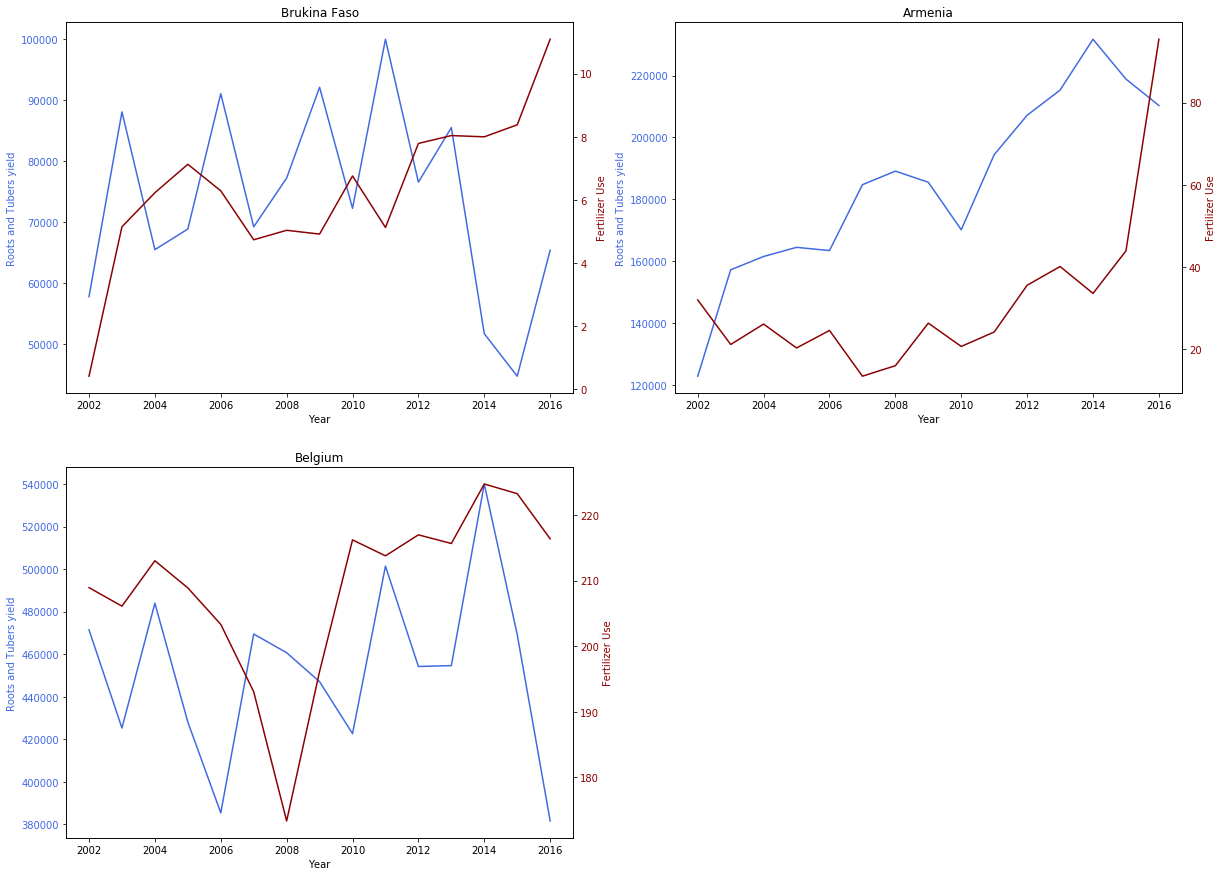

In [304]:
figure = plt.figure(figsize=(20,15))

ax1 = figure.add_subplot(2,2,1)
ax1.plot(Burkina_Roots['Year'], Burkina_Roots['Roots and Tubers,Total'], c ='royalblue')
ax1.set_ylabel('Roots and Tubers yield', color = 'royalblue')
ax1.set_xlabel('Year')
ax1.tick_params(axis='y', labelcolor='royalblue')
plt.title('Brukina Faso')

ax2 = ax1.twinx()
ax2.plot(Burkina_ferti['Year'], Burkina_ferti['Value'], c='darkred')
ax2.set_ylabel('Fertilizer Use', color = 'darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

ax3 = figure.add_subplot(2,2,2)
ax3.plot(Armenia_Roots['Year'], Armenia_Roots['Roots and Tubers,Total'], c ='royalblue')
ax3.set_ylabel('Roots and Tubers yield', color = 'royalblue')
ax3.set_xlabel('Year')
ax3.tick_params(axis='y', labelcolor='royalblue')
plt.title('Armenia')

ax4 = ax3.twinx()
ax4.plot(Armenia_ferti['Year'], Armenia_ferti['Value'], c='darkred')
ax4.set_ylabel('Fertilizer Use', color = 'darkred')
ax4.tick_params(axis='y', labelcolor='darkred')

ax5 = figure.add_subplot(2,2,3)
ax5.plot(Belgium_Roots['Year'], Belgium_Roots['Roots and Tubers,Total'], c ='royalblue')
ax5.set_ylabel('Roots and Tubers yield', color = 'royalblue')
ax5.set_xlabel('Year')
ax5.tick_params(axis='y', labelcolor='royalblue')
plt.title('Belgium')

ax6 = ax5.twinx()
ax6.plot(Belgium_ferti['Year'], Belgium_ferti['Value'], c='darkred')
ax6.set_ylabel('Fertilizer Use', color = 'darkred')
ax6.tick_params(axis='y', labelcolor='darkred')

**Observation:** This kind of specific analysis doesn't make when comparing with a value of fertilizer use computed at the scale of the country.

In [318]:
%run PCA_processing

years = []
Burkina_Faso_pca = []
Armenia_pca = []
Belgium_pca = []
Burkina_Faso_ferti = []
Armenia_ferti = []
Belgium_ferti = []
proportion_explained = []
for year in range(2002,2017):
    print(year)
    years += [year]
    
    grouped_yield=crops.query('`Element Code` == 5419')\
                                .query('`Year Code` == @year')\
                                .query('`Item Code` >1000')\
                                .pivot(index='Area',columns='Item',values='Value')\
                                .fillna(value=0)\
                                .reset_index()

    pca,grouped_yield_pca = PCA_processing(grouped_yield,'Area', grouped_yield.columns[1:])


    fertilizer=(fertilizer_area.query('`Item Code` == (3102)')
        .query('`Year Code` == @year')
        .query('`Area Code` <300')
        .sort_values('Value', ascending=False)
    )

    grouped_yield_pca=pd.merge(grouped_yield_pca,fertilizer.loc[:,['Area','Value']],left_on='Area',right_on='Area')
    grouped_yield_pca['ferti_class']=grouped_yield_pca.Value.apply(lambda x: ferti_class(x, grouped_yield_pca.Value))

    Burkina_Faso_pca += [grouped_yield_pca[grouped_yield_pca.Area=='Burkina Faso'].PC1.values[0]]
    Armenia_pca += [grouped_yield_pca[grouped_yield_pca.Area=='Armenia'].PC1.values[0]]
    Belgium_pca += [grouped_yield_pca[grouped_yield_pca.Area=='Belgium'].PC1.values[0]]
    Burkina_Faso_ferti += [grouped_yield_pca[grouped_yield_pca.Area=='Burkina Faso'].Value.values[0]]
    Armenia_ferti += [grouped_yield_pca[grouped_yield_pca.Area=='Armenia'].Value.values[0]]
    Belgium_ferti += [grouped_yield_pca[grouped_yield_pca.Area=='Belgium'].Value.values[0]]
                          
    proportion_explained += [pca.explained_variance_ratio_[0]]

2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


<Figure size 432x288 with 0 Axes>

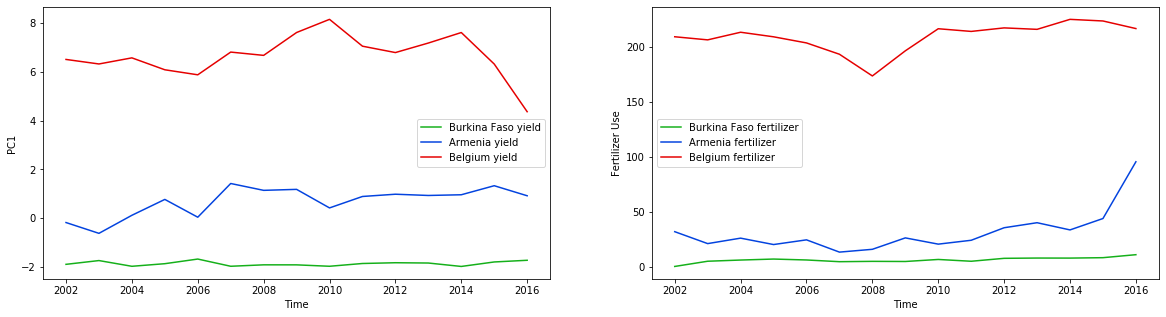

In [323]:
evolution_ferti = pd.DataFrame([years, Burkina_Faso_pca, Armenia_pca, Belgium_pca,Burkina_Faso_ferti, Armenia_ferti, Belgium_ferti], ['year', 'Burkina Faso yield', 'Armenia yield', 'Belgium yield','Burkina Faso fertilizer', 'Armenia fertilizer', 'Belgium fertilizer']).T

figure = plt.figure(figsize = (20,5))
ax1 = figure.add_subplot(1,2,1)
ax1.plot("year", "Burkina Faso yield", data=evolution_ferti, color=sns.xkcd_palette(colors)[0])
ax1.plot("year", "Armenia yield", data=evolution_ferti, color=sns.xkcd_palette(colors)[1])
ax1.plot("year", "Belgium yield", data=evolution_ferti, color=sns.xkcd_palette(colors)[2])
ax1.set_ylabel('PC1')
ax1.set_xlabel('Time')
ax1.legend()

ax2 = figure.add_subplot(1,2,2)
ax2.plot("year", "Burkina Faso fertilizer", data=evolution_ferti, color=sns.xkcd_palette(colors)[0])
ax2.plot("year", "Armenia fertilizer", data=evolution_ferti, color=sns.xkcd_palette(colors)[1])
ax2.plot("year", "Belgium fertilizer", data=evolution_ferti, color=sns.xkcd_palette(colors)[2])
ax2.set_ylabel('Fertilizer Use')
ax2.set_xlabel('Time')
ax2.legend()